In [51]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/covid-widhya/Covid.csv


In [52]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import matplotlib.ticker as ticker 

%matplotlib inline 

In [53]:
data=pd.read_csv('../input/covid-widhya/Covid.csv')
data.head()

,Sno,Date,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths
0,1,30/01/20,Kerala,1,0,0,0
1,2,31/01/20,Kerala,1,0,0,0
2,3,01/02/20,Kerala,2,0,0,0
3,4,02/02/20,Kerala,3,0,0,0
4,5,03/02/20,Kerala,3,0,0,0


In [54]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Sno                       270 non-null    int64 
 1   Date                      270 non-null    object
 2   State/UnionTerritory      270 non-null    object
 3   ConfirmedIndianNational   270 non-null    int64 
 4   ConfirmedForeignNational  270 non-null    int64 
 5   Cured                     270 non-null    int64 
 6   Deaths                    270 non-null    int64 
dtypes: int64(5), object(2)
memory usage: 14.9+ KB


## EDA

In [55]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Sno,270.0,135.500000,78.086491,1.0,68.25,135.5,202.75,270.0
ConfirmedIndianNational,270.0,5.551852,8.339625,0.0,1.00,3.0,6.00,60.0
ConfirmedForeignNational,270.0,1.329630,3.587288,0.0,0.00,0.0,0.00,14.0
Cured,270.0,0.603704,1.461522,0.0,0.00,0.0,0.00,9.0
Deaths,270.0,0.092593,0.290399,0.0,0.00,0.0,0.00,1.0


In [56]:
df=data.copy()

In [57]:
df['Date']=pd.to_datetime(df['Date'])

## Groupby Date

In [58]:
df=df.groupby(['Date']).agg({'ConfirmedIndianNational':'sum','ConfirmedForeignNational':'sum' ,'Cured':'sum' , 'Deaths':'sum'  })


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 52 entries, 2020-01-02 to 2020-12-03
Data columns (total 4 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   ConfirmedIndianNational   52 non-null     int64
 1   ConfirmedForeignNational  52 non-null     int64
 2   Cured                     52 non-null     int64
 3   Deaths                    52 non-null     int64
dtypes: int64(4)
memory usage: 2.0 KB


In [60]:
df['Total_Cases']=df['ConfirmedIndianNational']+df['ConfirmedForeignNational']+df['Cured']

In [61]:
df

,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Total_Cases
Date,,,,,
2020-01-02,2,0,0,0,2
2020-01-03,3,0,0,0,3
2020-01-30,1,0,0,0,1
2020-01-31,1,0,0,0,1
2020-02-02,3,0,0,0,3
2020-02-03,5,0,0,0,5
2020-02-13,3,0,0,0,3
2020-02-14,3,0,0,0,3
2020-02-15,3,0,0,0,3


In [62]:
df2=df.reset_index()
df2

,Date,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Total_Cases
0,2020-01-02,2,0,0,0,2
1,2020-01-03,3,0,0,0,3
2,2020-01-30,1,0,0,0,1
3,2020-01-31,1,0,0,0,1
4,2020-02-02,3,0,0,0,3
5,2020-02-03,5,0,0,0,5
6,2020-02-13,3,0,0,0,3
7,2020-02-14,3,0,0,0,3
8,2020-02-15,3,0,0,0,3
9,2020-02-16,3,0,0,0,3


In [63]:
df2[df2['Date']=='2020-04-03']

,Date,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Total_Cases
35,2020-04-03,12,16,3,0,31


## Visualization

In [64]:
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter


In [65]:

# Use white grid plot background from seaborn
sns.set(font_scale=1.5, style="whitegrid")

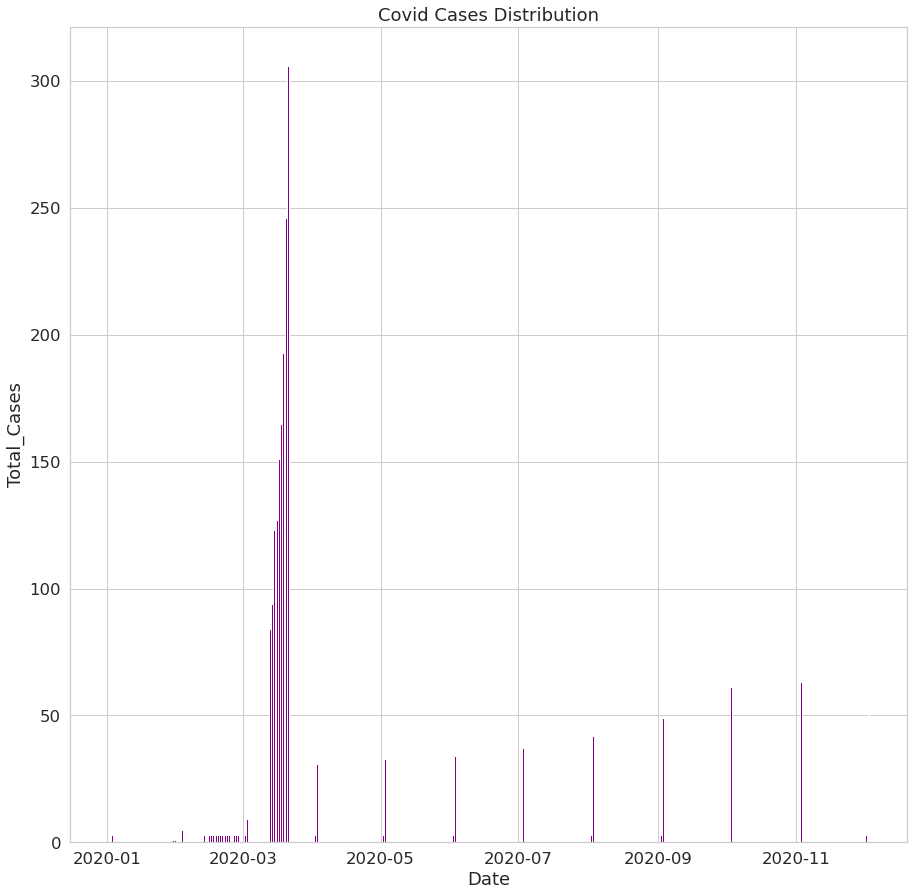

In [66]:
# Create figure and plot space
fig, ax = plt.subplots(figsize=(15, 15))

# Add x-axis and y-axis
ax.bar(df.index.values,
       df['Total_Cases'],
       color='purple')

# Set title and labels for axes
ax.set(xlabel="Date",
       ylabel="Total_Cases",
       title="Covid Cases Distribution")

plt.show()

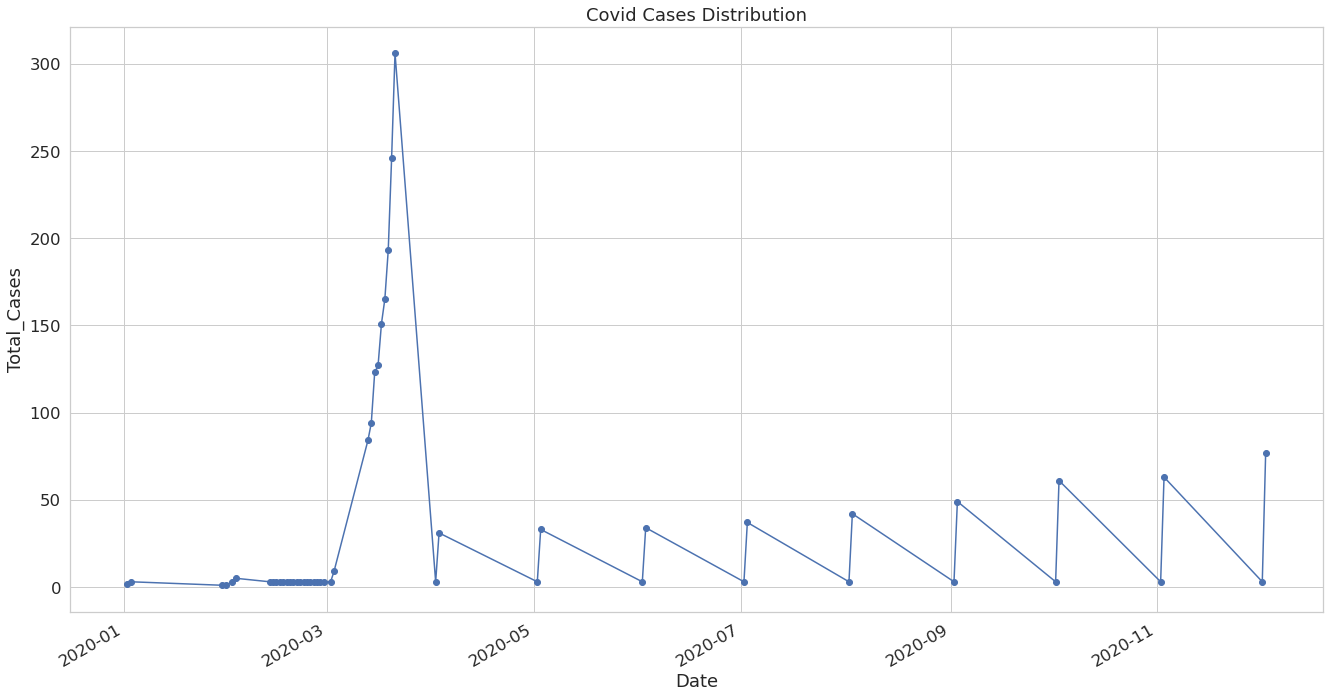

In [67]:
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
plt.plot_date(df.index.values, df['Total_Cases'], linestyle ='solid')
plt.tight_layout()
plt.gcf().autofmt_xdate()
plt.xlabel("Date",fontsize=18)
plt.ylabel("Total_Cases",fontsize=18)
plt.title("Covid Cases Distribution",fontsize='medium')
plt.show()

### To find the Rate of increase on each day from 4/03/2020 to 21/03/2020

In [68]:
df_filt=df['20200304':'20200322']
df_filt=df_filt.reset_index()
df_filt

,Date,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Total_Cases
0,2020-03-13,64,17,3,1,84
1,2020-03-14,67,17,10,2,94
2,2020-03-15,93,17,13,2,123
3,2020-03-16,97,17,13,2,127
4,2020-03-17,113,24,14,3,151
5,2020-03-18,126,25,14,3,165
6,2020-03-19,148,25,20,4,193
7,2020-03-20,191,32,23,4,246
8,2020-03-21,244,39,23,4,306


In [69]:
#Formula 
ll=[]
for i in range(0,len(df_filt)-1):
    
    rate=((df_filt.iloc[i+1,-1])-(df_filt.iloc[i,-1]))/df_filt.iloc[i,-1]
    
    ll.append(rate)


#we wont get last value so avoid it 


In [70]:
#Average Rate
r=np.mean(ll)
r

0.17874762499683367

In [71]:
import math
# Formula P_t=P_o*e^(r*t)
#P_o=31
#t=26

P_t=31*(math.exp(r*26))
P_t

3233.839643711223